<a href="https://colab.research.google.com/github/bharatbajoria/Summer-Internship/blob/master/Topic_Modelling_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PDF Reading

In [1]:
pip install pyPDF2

     |████████████████████████████████| 81kB 2.3MB/s 
  Created wheel for pyPDF2: filename=PyPDF2-1.26.0-cp36-none-any.whl size=61086 sha256=4978e490487aef58f374dd849bd5749708e309fbf6fca874db249590b8b2a895
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built pyPDF2


In [0]:
import PyPDF2

In [0]:
#Taking file input
#number of files
nf=2

file= open('Apr-18.PDF','rb')
file1= open('Apr-17.PDF','rb')
  

In [0]:
#A list of files
file_list=[file,file1]

In [0]:
# Reading number of pages
pages=[]

for i in range(nf):
  pdfReader = PyPDF2.PdfFileReader(file_list[i])
  n1=pdfReader.numPages
  pages.append(n1)

In [0]:
# A list containing all files, All_Docs[i] is i-th file 
# All_Docs[i][j] is j-th page of i-th file
All_Docs=[] 

In [0]:

for j in range(nf):
  pdfReader = PyPDF2.PdfFileReader(file_list[j])
  file_text=[] #takes string of page text
  for i in range(pages[j]):
    pageObj = pdfReader.getPage(i)
    a=pageObj.extractText()
    file_text.append(a)
  
  All_Docs.append(file_text)

In [8]:
type(All_Docs[0][1]),type(All_Docs[0])

(str, list)

# Finding Optimal number of Clusters

In [0]:
Dup_All_Docs=All_Docs[:]

In [10]:
type(Dup_All_Docs[0][0])

str

In [0]:
import nltk
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score

import pandas as pd
from nltk.tokenize import RegexpTokenizer
#from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
from nltk.corpus import stopwords
import gensim

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
tokenizer = RegexpTokenizer(r'\w+')
en_stop = set(stopwords.words('english'))
en_stop.add('the')#The is not in stopwords

In [0]:
tokens=[]


for j in All_Docs:
  x=[]
  for i in j:
    token=tokenizer.tokenize(i)
    token=[i for i in token if(not(str(i).isdigit() or not(str(i).isalpha())) and len(str(i)) > 2 )]
    token=[i.lower() for i in token if( i not in en_stop)]
    x.extend(token)
  
  tokens.extend(x)

In [15]:
len(tokens),tokens[:10]

(7941,
 ['press',
  'release',
  'department',
  'communication',
  'central',
  'office',
  'marg',
  'mumbai',
  'phone',
  'fax'])

In [0]:
#df9['Cleaned_PaperText'] = pd.Series(tokens)
        
vectorizer = TfidfVectorizer()

Y = vectorizer.fit_transform(tokens)

In [0]:
#Not Working

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(Y)
    kmeanModel.fit(Y)
   # distortions.append(sum(np.min(cdist(Y, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

In [18]:
#2nd Method using Silhouette Score

n=0
ss=0
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(Y)
    label = kmeans.labels_
    sil_coeff = silhouette_score(Y, label, metric='euclidean')  
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    if sil_coeff>ss:
      ss=sil_coeff
      n=n_cluster

For n_clusters=2, The Silhouette Coefficient is 0.026380620853574482
For n_clusters=3, The Silhouette Coefficient is 0.02990136605736556
For n_clusters=4, The Silhouette Coefficient is 0.0411350767494214
For n_clusters=5, The Silhouette Coefficient is 0.047114255231201496
For n_clusters=6, The Silhouette Coefficient is 0.04238571092146352
For n_clusters=7, The Silhouette Coefficient is 0.05791155192542937
For n_clusters=8, The Silhouette Coefficient is 0.05146533073404873
For n_clusters=9, The Silhouette Coefficient is 0.055566246562805136
For n_clusters=10, The Silhouette Coefficient is 0.06408540690743667


In [19]:
print("Optimal numbers of clusters are : {}".format(n))

Optimal numbers of clusters are : 10


# LDA

In [0]:

import nltk
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
from gensim.corpora import Dictionary
from gensim.models import TfidfModel,LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
import matplotlib.pyplot as plt


In [21]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:

dictionary=Dictionary([[i] for i in tokens])

In [23]:
print(dictionary)

Dictionary(2065 unique tokens: ['press', 'release', 'department', 'communication', 'central']...)


In [24]:
X=[dictionary.doc2bow([sents]) for sents in tokens]#getting bag of words.
tfidf=TfidfModel(X)

print(type(tfidf))
X=tfidf[X]


<class 'gensim.models.tfidfmodel.TfidfModel'>


In [0]:
from gensim.models import LdaMulticore,CoherenceModel

lda=LdaMulticore(X,num_topics=n,id2word=dictionary,workers=8)
lda1=LdaModel(X,num_topics=n,id2word=dictionary,update_every=5)

#lda.print_topics()

In [26]:

ldatopics = [[(word,prob) for word, prob in topic] for topicid, topic in lda.show_topics(formatted=False)]
lda.show_topics(formatted=True)

[(0,
  '0.037*"bank" + 0.019*"growth" + 0.019*"trade" + 0.018*"may" + 0.015*"impact" + 0.013*"the" + 0.013*"this" + 0.013*"current" + 0.012*"oil" + 0.011*"april"'),
 (1,
  '0.049*"february" + 0.038*"policy" + 0.029*"effects" + 0.023*"mpc" + 0.014*"second" + 0.011*"per" + 0.011*"expected" + 0.011*"first" + 0.010*"months" + 0.010*"three"'),
 (2,
  '0.060*"cent" + 0.021*"growth" + 0.020*"headline" + 0.019*"also" + 0.013*"repo" + 0.012*"monetary" + 0.012*"policy" + 0.010*"fuel" + 0.010*"implementation" + 0.008*"adopted"'),
 (3,
  '0.029*"per" + 0.027*"meeting" + 0.024*"global" + 0.012*"cpi" + 0.011*"domestic" + 0.011*"goods" + 0.010*"fuel" + 0.010*"could" + 0.010*"level" + 0.007*"outlook"'),
 (4,
  '0.031*"march" + 0.028*"year" + 0.027*"inflation" + 0.025*"likely" + 0.015*"price" + 0.014*"sector" + 0.013*"industrial" + 0.013*"prices" + 0.012*"cent" + 0.012*"january"'),
 (5,
  '0.019*"also" + 0.016*"impact" + 0.014*"economy" + 0.014*"since" + 0.013*"year" + 0.013*"cpi" + 0.013*"points" + 0.

# LSI HDP

In [0]:
lsi=  LsiModel(corpus=X, num_topics=n, id2word=dictionary,)
hdp=  HdpModel(corpus=X, id2word=dictionary)

In [28]:
lsi_words=[topic for topicid, topic in  lsi.show_topics() ]
lsi_words

['1.000*"inflation" + 0.000*"ahead" + 0.000*"india" + 0.000*"basis" + -0.000*"banks" + -0.000*"billion" + 0.000*"state" + 0.000*"capital" + 0.000*"even" + -0.000*"data"',
 '-1.000*"the" + -0.002*"monsoon" + 0.001*"higher" + 0.001*"since" + -0.001*"remained" + -0.001*"continued" + 0.001*"gap" + -0.001*"decline" + -0.001*"rates" + 0.001*"pulses"',
 '-1.000*"per" + 0.002*"account" + -0.001*"three" + 0.001*"last" + 0.001*"medium" + -0.001*"expectations" + -0.001*"well" + -0.001*"current" + -0.001*"conditions" + 0.001*"vegetable"',
 '1.000*"cent" + 0.002*"moderated" + -0.002*"gap" + 0.002*"would" + -0.002*"well" + 0.002*"management" + 0.002*"uncertainty" + 0.002*"exports" + -0.002*"goods" + -0.001*"released"',
 '1.000*"growth" + 0.002*"based" + 0.002*"section" + -0.002*"however" + 0.002*"prices" + 0.002*"basis" + 0.002*"account" + -0.002*"term" + -0.002*"first" + 0.001*"resolution"',
 '1.000*"prices" + 0.003*"half" + -0.002*"basis" + -0.002*"factors" + 0.002*"repo" + 0.002*"consumer" + 0.00

In [29]:
hdp_words=[topic for topicid, topic in  lsi.show_topics() ]
hdp_words

['1.000*"inflation" + 0.000*"ahead" + 0.000*"india" + 0.000*"basis" + -0.000*"banks" + -0.000*"billion" + 0.000*"state" + 0.000*"capital" + 0.000*"even" + -0.000*"data"',
 '-1.000*"the" + -0.002*"monsoon" + 0.001*"higher" + 0.001*"since" + -0.001*"remained" + -0.001*"continued" + 0.001*"gap" + -0.001*"decline" + -0.001*"rates" + 0.001*"pulses"',
 '-1.000*"per" + 0.002*"account" + -0.001*"three" + 0.001*"last" + 0.001*"medium" + -0.001*"expectations" + -0.001*"well" + -0.001*"current" + -0.001*"conditions" + 0.001*"vegetable"',
 '1.000*"cent" + 0.002*"moderated" + -0.002*"gap" + 0.002*"would" + -0.002*"well" + 0.002*"management" + 0.002*"uncertainty" + 0.002*"exports" + -0.002*"goods" + -0.001*"released"',
 '1.000*"growth" + 0.002*"based" + 0.002*"section" + -0.002*"however" + 0.002*"prices" + 0.002*"basis" + 0.002*"account" + -0.002*"term" + -0.002*"first" + 0.001*"resolution"',
 '1.000*"prices" + 0.003*"half" + -0.002*"basis" + -0.002*"factors" + 0.002*"repo" + 0.002*"consumer" + 0.00

In [0]:

ldatopics_word = [[word for word, prob in topic] for topicid, topic in lda.show_topics(formatted=False)]


col=[]
a='Topic-'
c=''
for i in range(n):
  c+=a+str(i+1)
  col.append(c)
  c=''

len(col),len(ldatopics_word)

#topic_df=pd.DataFrame(data=ldatopics_word,columns=col)
topic_df=pd.DataFrame(data=ldatopics_word,index=col)

In [0]:
topic_df_T=topic_df.T

**Adding New File**

In [0]:

new_file=open('Apr-20.PDF','rb')
pdfReader = PyPDF2.PdfFileReader(new_file)
n1=pdfReader.numPages

new_file_pg=[]
for i in range(n1):
    pageObj = pdfReader.getPage(i)
    a=pageObj.extractText()
    new_file_pg.append(a)

#new_file_pg[:3]

In [0]:
new_token=[]
x=[]
for i in new_file_pg:
    token=tokenizer.tokenize(i)
    token=[i for i in token if(not(str(i).isdigit() or not(str(i).isalpha())) and len(str(i)) > 2 )]
    token=[i.lower() for i in token if( i not in en_stop)]
    x.extend(token)
  
    new_token.extend(x)


Z=[dictionary.doc2bow([sents]) for sents in new_token]

In [0]:
newlda=lda1[Z]


In [35]:
len(Z)

32176

In [0]:
new_topic=[]
for topic in newlda:
  #new_topic.append(prob)
  new_topic.append(topic)

In [37]:
len(new_topic),type(new_topic[0])#,new_topic[:2]

(32176, list)

In [38]:
lda1.get_document_topics(Z,per_word_topics=True)

# Evaluating Model: Topic Wise


In [0]:
tk=[[i] for i in tokens]
ldatopics = [[word for word, prob in topic] for topicid, topic in lda.show_topics(formatted=False)]
lda_coherence = CoherenceModel(topics=ldatopics, texts=tk, dictionary=dictionary, window_size=10).get_coherence()
#lda_coherence

In [0]:

tk=[[i] for i in tokens]
lsitopics = [[word for word, prob in topic] for topicid, topic in lsi.show_topics(formatted=False)]
hdptopics = [[word for word, prob in topic] for topicid, topic in hdp.show_topics(formatted=False)]

for i in range(n):
  lda=LdaMulticore(X,num_topics=n,id2word=dictionary,workers=8)
  ldatopics = [[word for word, prob in topic] for topicid, topic in lda.show_topics(formatted=False)]
  lda_coherence = CoherenceModel(topics=ldatopics, texts=tk, dictionary=dictionary, window_size=10).get_coherence()
  #coherence_score.append(lda_coherence)



Coherence Score

In [41]:
coherence_score=[]

lda_coherence = CoherenceModel(topics=ldatopics, texts=tk, dictionary=dictionary, window_size=10).get_coherence()
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=tk, dictionary=dictionary, window_size=10).get_coherence()
hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=tk, dictionary=dictionary, window_size=10).get_coherence()


coherence_score.append(lda_coherence)
coherence_score.append(lsi_coherence)
coherence_score.append(hdp_coherence)

coherence_score

[0.7157394118032777, 0.7085739094883746, 0.8209106075152416]

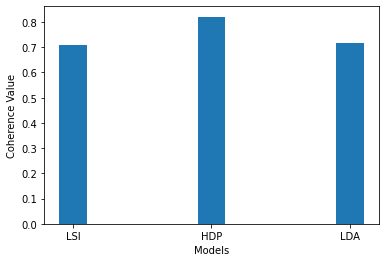

In [42]:
def evaluate_bar_graph(coherences, indices):
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')



evaluate_bar_graph([lsi_coherence, hdp_coherence, lda_coherence],
                   ['LSI', 'HDP', 'LDA'])
best_score=max(coherence_score)
i=coherence_score.index(best_score)

Data Frames for different Models

In [0]:
#LDA Data Frame
ldatopics = [[word for word, prob in topic] for topicid, topic in lda.show_topics(formatted=False)]
col_lda=[]
a='Topic'
for i in range(len(ldatopics)):
  col_lda.append(a+str(i+1))

topic_df_lda=pd.DataFrame(data=ldatopics,index=col_lda)
topic_df_T_lda=topic_df_lda.T

#LSI Data Frame
lsitopics = [[word for word, prob in topic] for topicid, topic in lsi.show_topics(formatted=False)]
col_lsi=[]
a='Topic'
for i in range(len(lsitopics)):
  col_lsi.append(a+str(i+1))
  
topic_df_lsi=pd.DataFrame(data=lsitopics,index=col_lsi)
topic_df_T_lsi=topic_df_lsi.T

#HDP Data Frame
hdptopics = [[word for word, prob in topic] for topicid, topic in hdp.show_topics(formatted=False)]
col_hdp=[]
a='Topic'
for i in range(len(hdptopics)):
  col_hdp.append(a+str(i+1))
topic_df_hdp=pd.DataFrame(data=hdptopics,index=col_hdp)
topic_df_T_hdp=topic_df_hdp.T


In [57]:
topic_df_T_lda.head()

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10
0,february,meeting,year,inflation,year,the,growth,inflation,cent,impact
1,bank,monetary,also,prices,several,domestic,per,rate,march,due
2,january,policy,headline,policy,excluding,february,cpi,reserve,investment,prices
3,production,output,inflation,second,around,policy,inflation,risks,food,global
4,growth,month,well,activity,output,section,cent,target,trade,level


In [58]:
topic_df_T_lsi.head()

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10
0,inflation,the,per,cent,growth,prices,february,policy,food,year
1,ahead,monsoon,account,moderated,based,half,policy,february,year,food
2,india,higher,three,gap,section,basis,term,state,basis,capital
3,basis,since,last,would,however,factors,index,last,pressures,there
4,banks,remained,medium,well,prices,repo,crude,one,consumer,last


In [59]:
topic_df_T_hdp.head()

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,Topic20
0,multilateral,iima,fell,upward,order,action,listed,balance,realisation,accele,weaker,compared,tourist,footing,upwards,publish,impede,procurement,uffer,currency
1,steadily,commitment,commencing,prefer,unsurprising,voting,authorities,hra,efficiency,course,olakia,turbulence,announcements,stronger,assets,achievement,omestic,widely,mixed,distinctly
2,components,entrenched,indicators,ool,micro,managing,lakh,therwise,raw,light,transmission,may,adjusted,awaited,penetrate,futur,announcements,overnments,container,persistent
3,intra,ture,easing,centre,assets,zable,tide,turn,significantly,intended,distended,ago,dholakia,readings,ordingly,picking,cso,ral,penetrate,estimates
4,calculations,reviewed,downside,vegetable,slower,specific,formula,pointing,today,new,while,utilisation,staggered,corridor,inched,minutes,vehicles,previous,timing,housing


# Evaluating Words in a Topic : Cosine scores.

In [0]:
#Dup_All_Docs=All_Docs[0]+All_Docs[1]
Dup_All_Docs=[]
for i in All_Docs:
  Dup_All_Docs+=i

df=[]

In [0]:
for j in All_Docs:
  for i in j:
    df.append(i)


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectoriser = CountVectorizer().fit(Dup_All_Docs)
X = vectoriser.transform(Dup_All_Docs)
df_vec=pd.DataFrame(X.A, columns=sorted(vectoriser.vocabulary_.keys(), key=lambda k: vectoriser.vocabulary_[k]))

In [0]:
df_page=pd.DataFrame(data=Dup_All_Docs)
#df_page.head()

In [49]:
type(df),len(df)

(list, 26)

In [0]:
word_data=[]

for i in df:
    token=tokenizer.tokenize(i)
    token=[i for i in token if(not(str(i).isdigit() or not(str(i).isalpha())) and len(str(i)) > 2 )]
    token=[i.lower() for i in token if( i not in en_stop)]
    word_data.append(token)

In [0]:
model1 = gensim.models.Word2Vec(word_data, min_count = 1,size = 100, window = 5) 

In [52]:
topic_df_T

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10
0,inflation,the,per,cent,growth,prices,february,policy,food,year
1,ahead,monsoon,account,moderated,based,half,policy,february,year,food
2,india,higher,three,gap,section,basis,term,state,basis,capital
3,basis,since,last,would,however,factors,index,last,pressures,there
4,banks,remained,medium,well,prices,repo,crude,one,consumer,last
5,billion,continued,expectations,management,basis,consumer,resolution,points,round,survey
6,state,gap,well,uncertainty,account,current,increase,consumer,government,one
7,capital,decline,current,exports,term,continued,this,gdp,trajectory,half
8,even,rates,conditions,goods,first,growth,goods,pulses,demonetisation,central
9,data,pulses,vegetable,released,resolution,medium,three,exports,pmi,recovery


Calculating statistical significance through Cosine Similarity Score

In [0]:
# List of topic wise words
import statistics 
from scipy import stats
from statistics import stdev

ds=[]
def statistical_signficance(topic_df_T,col,alpha,null_hyp):
  #topics_df_T: Dataframe of words for any model
  #col: Mtx with Topic Header, col[i]= Topic-i
  #alpha: Critical p-Value for rejecting null hypothesis
  #null_hyp: Value of mean for Null Hypothesis
  Average_comparison=null_hyp
  ds=[]
  for i in range((len(col))) :
    ds.append(list(topic_df_T[col[i]]))

  ds# ds[i] is i-th list of Topic-i

  simscore_topic=[]#initiating mtx for sim scores/cosine scores


  for p in range(len(ds)):
    k=len(ds[p])
    o=0

    sim=[]
    simt=[]
  
    for i in range(k):
      simt=[]
      for j in range(k)  :
        o=model1.similarity(ds[p][i],ds[p][j])
        simt.append(o)

      sim.append(simt)

    simscore_topic.append(sim)
# 3-D list, simscore_topic[i] is similarity scores for topic-i
# simscore_topic[i][j] is list of similarity score of j-th word in i-th Topic with other words


  
  t_score_all=[]
  p_value_all=[]
  mean=0
  sd=0

  t_value=0
  dup_score=[]
  p=0
  p_value=[]
  t2=0
  for i in range(len(ds)):
    print("Topic-{}".format(i))
    t=[]
    p_value_topic=[]
    for j in range(len(ds[i])):         
      dup_score=simscore_topic[i][j][:]    
      dup_score.pop(j)# removing score of i-th element with itself which is=1
      t2,p=stats.ttest_1samp(np.array(dup_score),popmean=Average_comparison)    
      t.append(t2)
      p_value_topic.append(p)
      pass

    t_score_all.append(t)
    p_value_all.append(p_value_topic)
  
  word_to_remove=[] #initializing tuple to save topicid and word outside cluster
  for i in range(len(p_value_all)):
    word=[]
    for j in range(len(p_value_all)):
      if p_value_all[i][j]>= alpha:
        word.append(ds[i][j])
    
    word_to_remove.append(word)




  
  return word_to_remove,ds   

In [0]:
gbl = globals()


#df_topic_name = ['SymbolA','SymbolB', 'SymbolC' .... 'SymbolN']

for i in range(len(col)):   

   gbl[str('df')+col[i]] = pd.DataFrame(simscore_topic[i],index=ds[i],columns=ds[i])
   print("Similarity Scores matrix for Topic-{}".format(i+1))
   print(gbl[str('df')+col[i]])
   print("\n\n")

In [0]:
#Topic1_df=pd.DataFrame(simscore_topic[0],index=ds[0],columns=ds[0])
gbl.items()

In [0]:
gbl[Topic-1]